In [ ]:
# prepare a naive-bayes' classification model for predicting the purchase power of a user

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, f1_score

In [ ]:
df=pd.read_csv('User_Data.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Always the drop those columums which are not contributing towards prediction purpose
df.drop(['User ID'], axis=1, inplace=True)

In [ ]:
# Label Encoding
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
# One-Hot Encoding is used to provide numerical labels to our categorical data
# it is useful only when we have less number of categorical varables present in feature variable

In [ ]:
# Split data into dependent/independent variables
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Split the data into train/test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=True)

In [ ]:
# Scale dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Classifier
classifier=GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Prediction
y_pred=classifier.predict(x_test)
# Accuracy
accuracy_score(y_test, y_pred)

0.87

In [ ]:
# Classification report
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        58
           1       0.84      0.86      0.85        42

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [ ]:
# Precision recall and f1_score are the performance measurement parameters for a machine learning model

<Figure size 200x200 with 0 Axes>

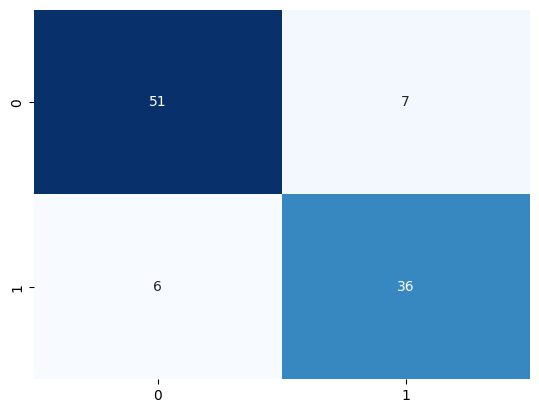

<Figure size 200x200 with 0 Axes>

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)